In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import spicy 
from spicy import stats

In [2]:
fhs_flashsale_product = pd.read_csv('/home/it/Desktop/NTMINH/Data/Data_Fahasa/fhs_flashsale_product.csv')
fhs_flashsale_period = pd.read_csv('/home/it/Desktop/NTMINH/Data/Data_Fahasa/fhs_flashsale_period.csv')
fhs_catalog_product_entity = pd.read_csv('/home/it/Desktop/NTMINH/Data/Data_Fahasa/fhs_catalog_product_entity.csv')
fhs_sales_flat_order = pd.read_csv('/home/it/Desktop/NTMINH/Data/Data_Fahasa/fhs_sales_flat_order.csv')
fhs_sales_flat_order_item = pd.read_csv('/home/it/Desktop/NTMINH/Data/Data_Fahasa/fhs_sales_flat_order_item.csv')
fhs_catalog_product_entity_decimal = pd.read_csv('/home/it/Desktop/NTMINH/Data/Data_Fahasa/fhs_catalog_product_entity_decimal.csv')
fhs_product_stock_log = pd.read_csv('/home/it/Desktop/NTMINH/Data/Data_Fahasa/fhs_product_stock_log.csv')
product_dim = pd.read_csv('/home/it/Desktop/NTMINH/Data/Data_Fahasa/product_dim.csv')

In [3]:
from Data_train import ulti
ulti.rename_columns(fhs_flashsale_product, 'fhs_flashsale_product')
ulti.rename_columns(fhs_flashsale_period, 'fhs_flashsale_period')
ulti.rename_columns(fhs_catalog_product_entity, 'fhs_catalog_product_entity')
ulti.rename_columns(fhs_sales_flat_order, 'fhs_sales_flat_order')
ulti.rename_columns(fhs_sales_flat_order_item, 'fhs_sales_flat_order_item')
ulti.rename_columns(fhs_catalog_product_entity_decimal, 'fhs_catalog_product_entity_decimal')
ulti.rename_columns(fhs_product_stock_log, 'fhs_product_stock_log')
ulti.rename_columns(product_dim, 'product_dim')

In [4]:
fhs_sales_flat_order_item_state  \
                    = pd.merge(fhs_sales_flat_order, fhs_sales_flat_order_item,
                              left_on = 'fhs_sales_flat_order.entity_id', 
                              right_on = 'fhs_sales_flat_order_item.order_id')

ulti.string_to_datetime(fhs_sales_flat_order_item_state, 'fhs_sales_flat_order_item.created_at')

In [5]:
# Giả sử xét trong năm 2020
min_year = pd.to_datetime(f'{2020}/1/1',
                              format = '%Y/%m/%d %H:%M:%S')
max_year = pd.to_datetime(f'{2020}/12/31 23:59:59',
                              format = '%Y/%m/%d %H:%M:%S')

condition2 = ((fhs_sales_flat_order_item_state['fhs_sales_flat_order_item.created_at'] >=  min_year)
          &           (fhs_sales_flat_order_item_state['fhs_sales_flat_order_item.created_at'] <=  max_year))     
fhs_sales_flat_order_item_state_2020 = fhs_sales_flat_order_item_state.loc[condition2] 

# Xét các đơn hàng thành công
fhs_sales_flat_order_item_state_2020 = \
          fhs_sales_flat_order_item_state_2020\
                    .loc[(fhs_sales_flat_order_item_state_2020['fhs_sales_flat_order.state'].isin(['complete']))
                    &    (fhs_sales_flat_order_item_state_2020['fhs_sales_flat_order.status'].isin(['complete']))]

In [6]:
fhs_sales_flat_order_item_state_2020 = fhs_sales_flat_order_item_state_2020.loc[:, 
          ['fhs_sales_flat_order.store_id', 'fhs_sales_flat_order_item.created_at', 'fhs_sales_flat_order_item.sku']]

In [7]:
fhs_sales_flat_order_item_state_2020_1 = fhs_sales_flat_order_item_state_2020\
          .loc[fhs_sales_flat_order_item_state_2020['fhs_sales_flat_order.store_id'] == 1]
fhs_sales_flat_order_item_state_2020_1

,fhs_sales_flat_order.store_id,fhs_sales_flat_order_item.created_at,fhs_sales_flat_order_item.sku
6195150,1,2020-01-02 08:25:50,9780194812313
6196848,1,2020-01-01 00:00:08,8935072940157
6196849,1,2020-01-01 00:00:08,8935251408300
6196866,1,2020-01-01 00:00:20,8935250703338-qt
6196867,1,2020-01-01 00:00:20,8935250703338
...,...,...,...
8970763,1,2020-12-31 23:55:02,8936186547591
8970766,1,2020-12-31 23:56:28,8936066689137
8970767,1,2020-12-31 23:56:28,8936066689144
8970768,1,2020-12-31 23:56:28,8936066689151


In [8]:
fhs_sales_flat_order_item_state_2020_2 = fhs_sales_flat_order_item_state_2020\
          .loc[fhs_sales_flat_order_item_state_2020['fhs_sales_flat_order.store_id'] == 2]
fhs_sales_flat_order_item_state_2020_2

,fhs_sales_flat_order.store_id,fhs_sales_flat_order_item.created_at,fhs_sales_flat_order_item.sku
6205861,2,2020-01-02 13:19:08,9780062343963
6205862,2,2020-01-02 13:19:08,9781473666931
6205863,2,2020-01-02 13:19:08,9780062073488
6205864,2,2020-01-02 13:19:08,9780552161275
6205865,2,2020-01-02 13:19:08,9780007548699
...,...,...,...
8966610,2,2020-12-31 11:07:29,9781101911310-tl
8967279,2,2020-12-31 12:50:11,9786048557645
8967280,2,2020-12-31 12:50:11,9786045857922
8967281,2,2020-12-31 12:50:11,9781108430463


In [9]:
fhs_sales_flat_order_item_state_2020_4 = fhs_sales_flat_order_item_state_2020\
          .loc[fhs_sales_flat_order_item_state_2020['fhs_sales_flat_order.store_id'] == 4]
fhs_sales_flat_order_item_state_2020_4

,fhs_sales_flat_order.store_id,fhs_sales_flat_order_item.created_at,fhs_sales_flat_order_item.sku
6196948,4,2020-01-01 00:02:11,8935244814767
6196949,4,2020-01-01 00:02:11,8935244814774
6196950,4,2020-01-01 00:02:11,8935244814781
6196951,4,2020-01-01 00:02:11,8935244814798
6196952,4,2020-01-01 00:02:11,8935244814804
...,...,...,...
8970780,4,2020-12-31 23:57:16,9780141389936-tl
8970782,4,2020-12-31 23:59:50,1306010020823
8970783,4,2020-12-31 23:59:50,8935244819830
8970784,4,2020-12-31 23:59:50,8935244822151


In [10]:
print(len(fhs_sales_flat_order_item_state_2020_1)/len(set(fhs_sales_flat_order_item_state_2020_1['fhs_sales_flat_order_item.sku'])))
print(len(fhs_sales_flat_order_item_state_2020_2)/len(set(fhs_sales_flat_order_item_state_2020_2['fhs_sales_flat_order_item.sku'])))
print(len(fhs_sales_flat_order_item_state_2020_4)/len(set(fhs_sales_flat_order_item_state_2020_4['fhs_sales_flat_order_item.sku'])))

14.699353138476281
1.3690667739340305
13.696091150093068


In [11]:
np.sum(fhs_sales_flat_order_item_state_2020_1\
          .groupby(['fhs_sales_flat_order_item.sku',
                     fhs_sales_flat_order_item_state_2020_1['fhs_sales_flat_order_item.created_at'].dt.date
                    ])['fhs_sales_flat_order.store_id'].count().reset_index()['fhs_sales_flat_order.store_id'] > 50)

261

In [12]:
np.sum(fhs_sales_flat_order_item_state_2020_2\
          .groupby(['fhs_sales_flat_order_item.sku',
                     fhs_sales_flat_order_item_state_2020_2['fhs_sales_flat_order_item.created_at'].dt.date
                    ])['fhs_sales_flat_order.store_id'].count().reset_index()['fhs_sales_flat_order.store_id'] > 50)

0

In [13]:
np.sum(fhs_sales_flat_order_item_state_2020_4\
          .groupby(['fhs_sales_flat_order_item.sku',
                     fhs_sales_flat_order_item_state_2020_4['fhs_sales_flat_order_item.created_at'].dt.date
                    ])['fhs_sales_flat_order.store_id'].count().reset_index()['fhs_sales_flat_order.store_id'] > 50)

514

AttributeError: 'NoneType' object has no attribute 'remove'

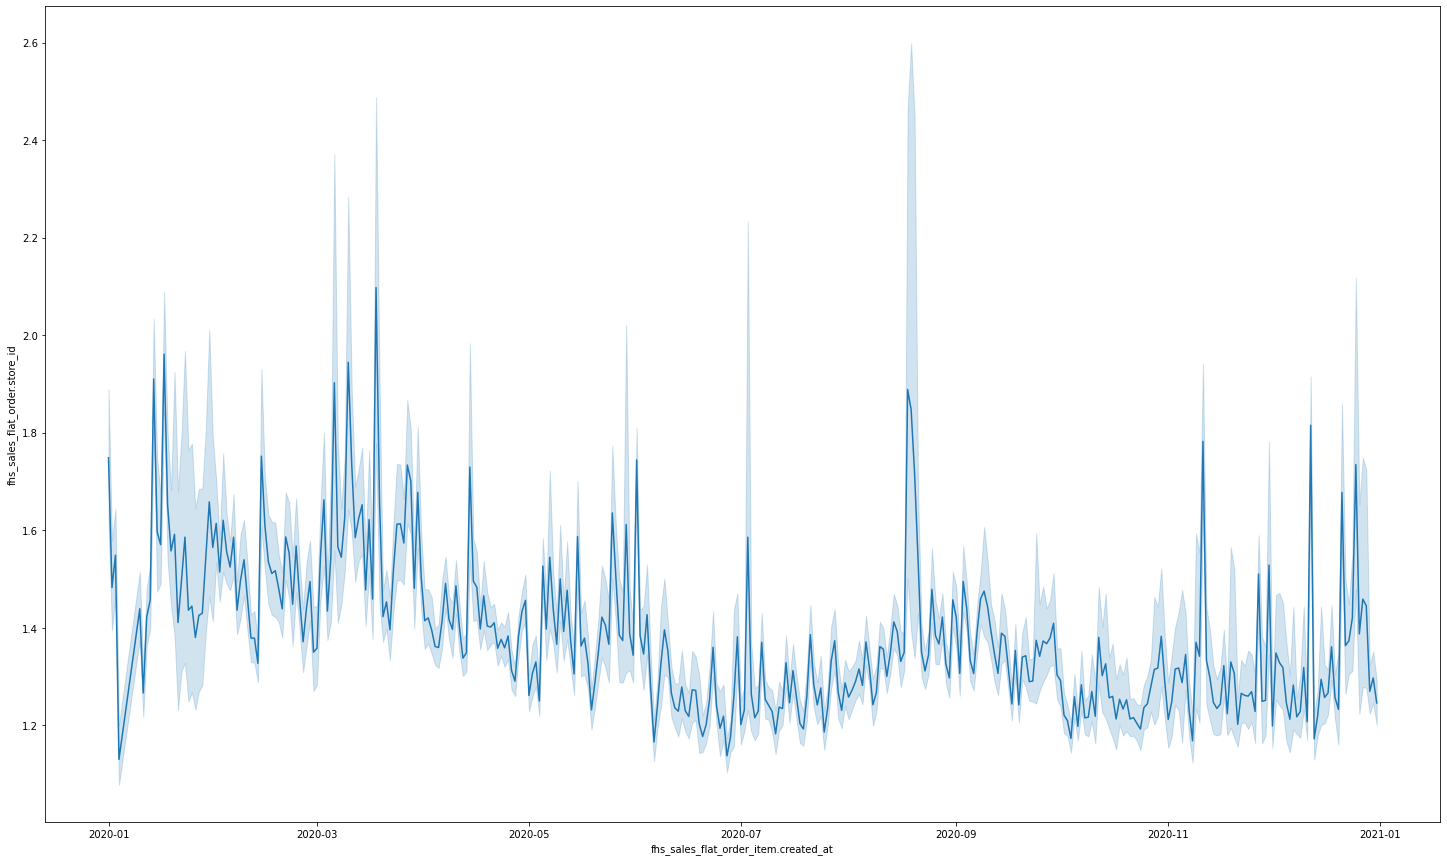

In [14]:
_1 = fhs_sales_flat_order_item_state_2020_1\
          .groupby(['fhs_sales_flat_order_item.sku',
                     fhs_sales_flat_order_item_state_2020_1['fhs_sales_flat_order_item.created_at'].dt.date
                    ])['fhs_sales_flat_order.store_id'].count().reset_index()

fig, ax = plt.subplots(figsize = (25,15))
ulti.string_to_datetime(_1, 'fhs_sales_flat_order_item.created_at')
sns.lineplot(data = _1, 
          x = _1['fhs_sales_flat_order_item.created_at'].dt.date,
          y = 'fhs_sales_flat_order.store_id')
# ax.get_legend().remove()

<AxesSubplot:xlabel='fhs_sales_flat_order_item.created_at', ylabel='fhs_sales_flat_order.store_id'>

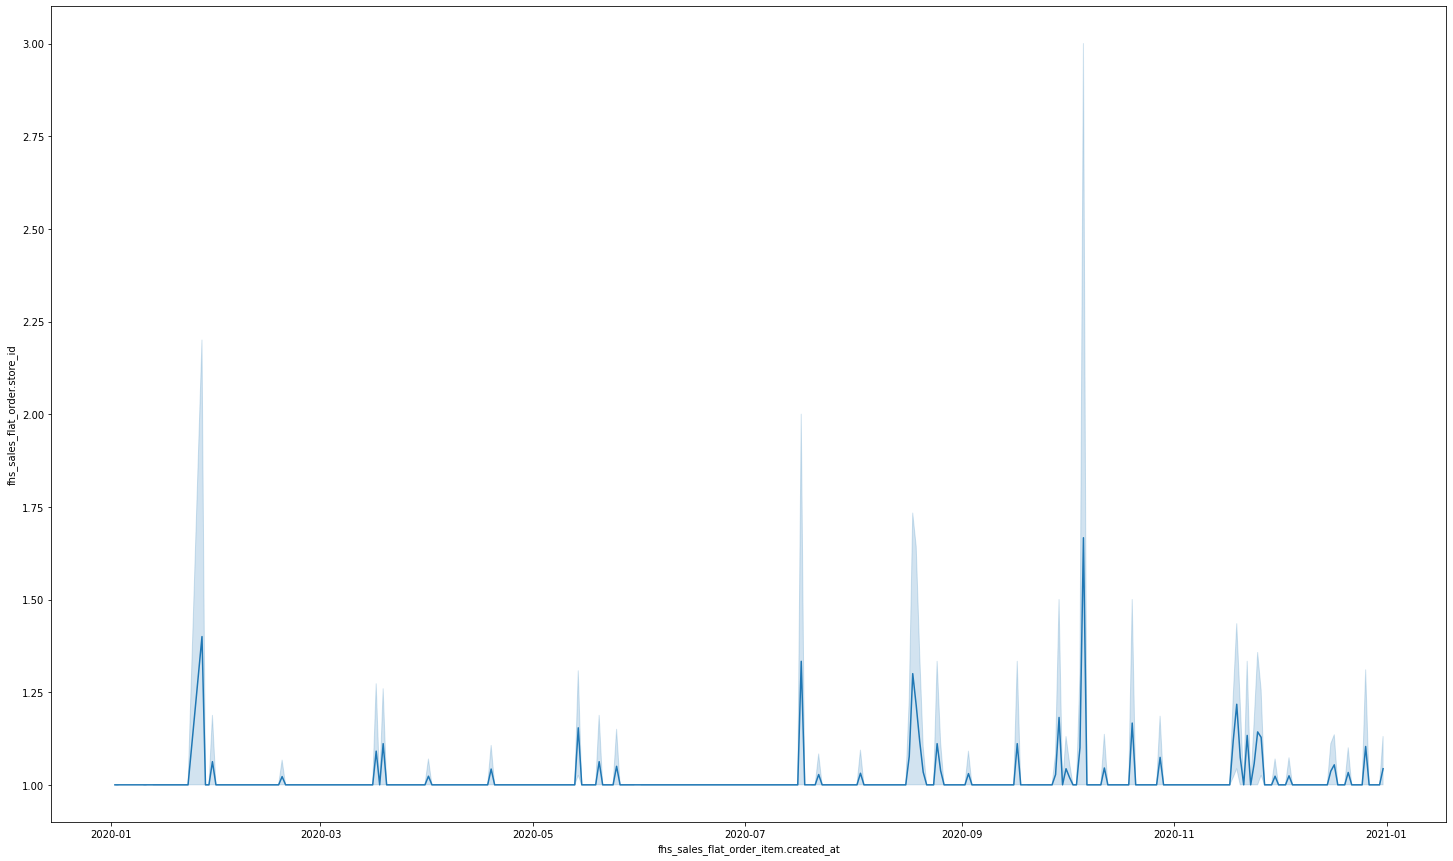

In [16]:
_2 = fhs_sales_flat_order_item_state_2020_2\
          .groupby(['fhs_sales_flat_order_item.sku',
                     fhs_sales_flat_order_item_state_2020_2['fhs_sales_flat_order_item.created_at'].dt.date
                    ])['fhs_sales_flat_order.store_id'].count().reset_index()

fig, ax = plt.subplots(figsize = (25,15))
ulti.string_to_datetime(_2, 'fhs_sales_flat_order_item.created_at')
sns.lineplot(data = _2, 
          x = _2['fhs_sales_flat_order_item.created_at'].dt.date,
          y = 'fhs_sales_flat_order.store_id')

<AxesSubplot:xlabel='fhs_sales_flat_order_item.created_at', ylabel='fhs_sales_flat_order.store_id'>

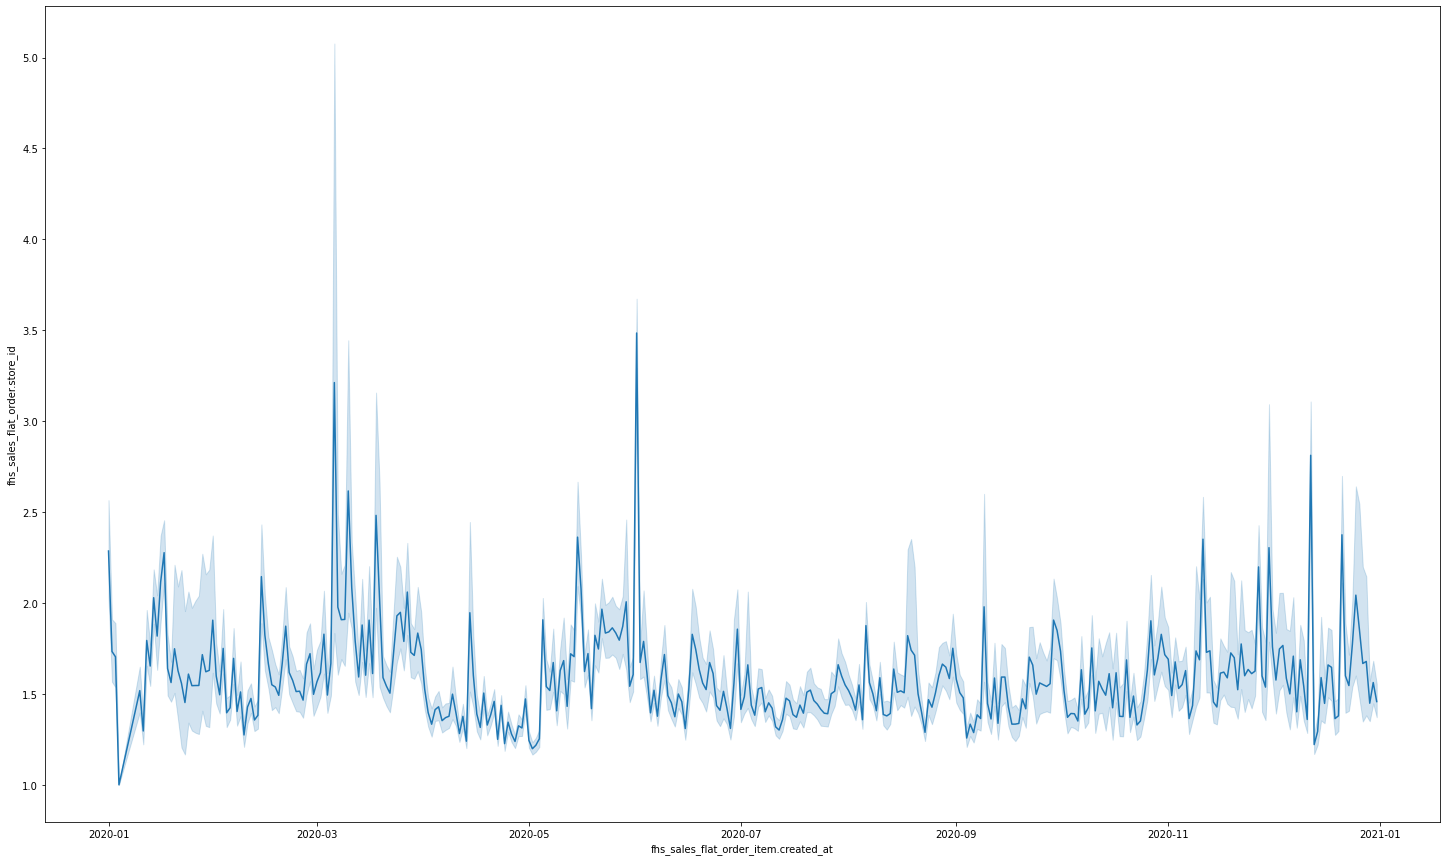

In [19]:
_4 = fhs_sales_flat_order_item_state_2020_4\
          .groupby(['fhs_sales_flat_order_item.sku',
                     fhs_sales_flat_order_item_state_2020_4['fhs_sales_flat_order_item.created_at'].dt.date
                    ])['fhs_sales_flat_order.store_id'].count().reset_index()

fig, ax = plt.subplots(figsize = (25,15))
ulti.string_to_datetime(_4, 'fhs_sales_flat_order_item.created_at')
sns.lineplot(data = _4, 
          x = _4['fhs_sales_flat_order_item.created_at'].dt.date,
          y = 'fhs_sales_flat_order.store_id')